# Inpatient Analysis and Predicating Length of Stay

### **Data Source Link**


Data Source Link: https://health.data.ny.gov/Health/Hospital-Inpatient-Discharges-SPARCS-De-Identified/tg3i-cinn


In [1]:
# import pandas library
import pandas as pd

# import numpy library
import numpy as np

# import seaborn library
import seaborn as sns

# import matplotlib library
import matplotlib.pyplot as plt


In [3]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

In [190]:
#data = pd.read_csv(r"C:\Users\rohit\OneDrive\Desktop\project dta\rawdata.csv",low_memory =False)
print(data.shape)

(2544543, 34)


In [4]:
data = pd.read_excel('C:\\Users\\rohit\\OneDrive\\Desktop\\project dta\\subsetdata.xlsx')

In [97]:
data.shape

(254454, 34)

In [5]:
data.head(2)

,Health Service Area,Hospital County,Operating Certificate Number,Facility ID,Facility Name,Age Group,Zip Code - 3 digits,Gender,Race,Ethnicity,Length of Stay,Type of Admission,Patient Disposition,Discharge Year,CCS Diagnosis Code,CCS Diagnosis Description,CCS Procedure Code,CCS Procedure Description,APR DRG Code,APR DRG Description,APR MDC Code,APR MDC Description,APR Severity of Illness Code,APR Severity of Illness Description,APR Risk of Mortality,APR Medical Surgical Description,Payment Typology 1,Payment Typology 2,Payment Typology 3,Birth Weight,Abortion Edit Indicator,Emergency Department Indicator,Total Charges,Total Costs
0,New York City,Queens,7003004.0,1630.0,Long Island Jewish Medical Center,70 or Older,113,F,White,Not Span/Hispanic,3,Emergency,Home w/ Home Health Services,2012,106,Cardiac dysrhythmias,0,NO PROC,201,Cardiac arrhythmia & conduction disorders,5,Diseases and Disorders of the Circulatory System,3,Major,Extreme,Medical,Medicare,Medicaid,Self-Pay,0,N,Y,23167.21,5512.0
1,Long Island,Suffolk,5154000.0,924.0,Southside Hospital,50 to 69,117,F,White,Not Span/Hispanic,5,Emergency,Home or Self Care,2012,657,Mood disorders,0,NO PROC,751,Major depressive disorders & other/unspecified...,19,Mental Diseases and Disorders,2,Moderate,Minor,Medical,Medicare,Medicaid,NaN,0,N,N,21746.40,4865.8


In [6]:
data.tail(2)

,Health Service Area,Hospital County,Operating Certificate Number,Facility ID,Facility Name,Age Group,Zip Code - 3 digits,Gender,Race,Ethnicity,Length of Stay,Type of Admission,Patient Disposition,Discharge Year,CCS Diagnosis Code,CCS Diagnosis Description,CCS Procedure Code,CCS Procedure Description,APR DRG Code,APR DRG Description,APR MDC Code,APR MDC Description,APR Severity of Illness Code,APR Severity of Illness Description,APR Risk of Mortality,APR Medical Surgical Description,Payment Typology 1,Payment Typology 2,Payment Typology 3,Birth Weight,Abortion Edit Indicator,Emergency Department Indicator,Total Charges,Total Costs
254452,Central NY,Onondaga,3301007.0,635.0,University Hospital SUNY Health Science Center,0 to 17,134,M,White,Not Span/Hispanic,3,Emergency,Home w/ Home Health Services,2012,237,Complication of device; implant or graft,2,IRR XCRANIAL VENT SHUNT,22,Ventricular shunt procedures,1,Diseases and Disorders of the Nervous System,1,Minor,Minor,Surgical,Medicaid,Medicaid,NaN,0,N,Y,30925.50,10117.02
254453,Western NY,Erie,1401013.0,292.0,Sisters of Charity Hospital - St Joseph Campus,70 or Older,140,M,White,Not Span/Hispanic,2,Emergency,Home or Self Care,2012,245,Syncope,203,ELECTROGR CARDIAC MONIT,204,Syncope & collapse,5,Diseases and Disorders of the Circulatory System,1,Minor,Moderate,Medical,Medicare,Medicare,NaN,0,N,Y,8449.28,3533.46


In [7]:
data.dtypes

Health Service Area                     object
Hospital County                         object
Operating Certificate Number           float64
Facility ID                            float64
Facility Name                           object
Age Group                               object
Zip Code - 3 digits                     object
Gender                                  object
Race                                    object
Ethnicity                               object
Length of Stay                          object
Type of Admission                       object
Patient Disposition                     object
Discharge Year                           int64
CCS Diagnosis Code                       int64
CCS Diagnosis Description               object
CCS Procedure Code                       int64
CCS Procedure Description               object
APR DRG Code                             int64
APR DRG Description                     object
APR MDC Code                             int64
APR MDC Descr

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254454 entries, 0 to 254453
Data columns (total 34 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   Health Service Area                  253770 non-null  object 
 1   Hospital County                      253770 non-null  object 
 2   Operating Certificate Number         253770 non-null  float64
 3   Facility ID                          253770 non-null  float64
 4   Facility Name                        254454 non-null  object 
 5   Age Group                            254454 non-null  object 
 6   Zip Code - 3 digits                  250597 non-null  object 
 7   Gender                               254454 non-null  object 
 8   Race                                 254454 non-null  object 
 9   Ethnicity                            254454 non-null  object 
 10  Length of Stay                       254454 non-null  object 
 11  Type of Admis

In [10]:
data.describe()

,Operating Certificate Number,Facility ID,Discharge Year,CCS Diagnosis Code,CCS Procedure Code,APR DRG Code,APR MDC Code,APR Severity of Illness Code,Birth Weight,Total Charges,Total Costs
count,2.537700e+05,253770.000000,254454.0,254454.000000,254454.000000,254454.000000,254454.000000,254454.000000,254454.000000,2.544540e+05,2.544540e+05
mean,5.025940e+06,1044.873468,2012.0,191.707660,114.187008,409.791003,10.238853,2.000047,310.192019,3.332896e+04,1.208568e+04
std,2.249249e+06,694.340472,0.0,157.698501,87.774714,240.379119,5.928568,0.912711,966.420216,6.264650e+04,2.605895e+04
min,1.010000e+05,1.000000,2012.0,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,8.000000e-01,1.900000e-01
25%,2.951001e+06,541.000000,2012.0,106.000000,1.000000,198.000000,5.000000,1.000000,0.000000,8.935655e+03,3.588440e+03
50%,5.907002e+06,1122.000000,2012.0,157.000000,134.000000,380.000000,9.000000,2.000000,0.000000,1.781901e+04,6.633945e+03
75%,7.002002e+06,1450.000000,2012.0,218.000000,213.000000,640.000000,15.000000,3.000000,0.000000,3.590346e+04,1.282190e+04
max,7.004010e+06,9250.000000,2012.0,670.000000,231.000000,956.000000,25.000000,4.000000,8300.000000,4.839726e+06,3.901874e+06


In [11]:
data.describe(include='object')

,Health Service Area,Hospital County,Facility Name,Age Group,Zip Code - 3 digits,Gender,Race,Ethnicity,Length of Stay,Type of Admission,Patient Disposition,CCS Diagnosis Description,CCS Procedure Description,APR DRG Description,APR MDC Description,APR Severity of Illness Description,APR Risk of Mortality,APR Medical Surgical Description,Payment Typology 1,Payment Typology 2,Payment Typology 3,Abortion Edit Indicator,Emergency Department Indicator
count,253770,253770,254454,254454,250597,254454,254454,254454,254454,254454,254454,254454,254454,254454,254454,254445,254445,254454,254454,178151,72220,254454,254454
unique,8,57,234,5,50,3,4,3,120,6,19,261,228,316,26,4,4,3,10,10,10,2,2
top,New York City,Manhattan,Mount Sinai Hospital,70 or Older,112,F,White,Not Span/Hispanic,2,Emergency,Home or Self Care,Liveborn,NO PROC,"Neonate birthwt >2499g, normal newborn or neon...",Diseases and Disorders of the Circulatory System,Moderate,Minor,Medical,Medicare,Medicaid,Self-Pay,N,Y
freq,119962,43287,5941,70031,35474,143449,145166,210073,57644,160436,172514,23672,63474,20799,35075,93466,155432,195332,95578,60439,51789,253910,150033


**Inference: In total we have 4 float features, 8 int feature and 22 object features**

**Inference: In our dataset we have more number of object type variable which will be handled through encoding.**

In [12]:
#Target Variable: Length of Stay
data['Length of Stay'].unique()

array(['3', '5', '1', '6', '2', '4', '25', '28', '11', '12', '36', '8',
       '9', '21', '20', '15', '14', '16', '10', '17', '7', '84', '23',
       '52', '67', '37', '18', '24', '13', '85', '26', '33', '120 +',
       '27', '32', '46', '48', '47', '30', '19', '39', '22', '72', '79',
       '90', '50', '99', '60', '115', '29', '43', '34', '38', '44', '41',
       '42', '57', '59', '69', '35', '31', '76', '94', '55', '58', '65',
       '40', '66', '109', '63', '45', '51', '82', '71', '88', '56', '111',
       '74', '68', '117', '61', '95', '49', '113', '70', '81', '73', '53',
       '92', '64', '114', '112', '54', '62', '97', '101', '93', '77',
       '87', '75', '83', '80', '106', '98', '91', '103', '107', '96',
       '110', '89', '78', '119', '105', '86', '104', '108', '118', '116',
       '102', '100'], dtype=object)

In [13]:
data['Length of Stay'].nunique()

120

**Inference: Length of stay column, which is currently an object. Will convert it to 'int' to allow for the possibility of regression analysis, some entries are written as '120 +', converting it into 120.**

In [14]:
# Converting '120+' to '120' and converting datatype to number 
data['Length of Stay'] = data['Length of Stay'].replace('120 +','120')
data['Length of Stay'] = data['Length of Stay'].astype(int)

In [107]:
#Exploring the target variable, if there,s any imbalance
data['Length of Stay'].value_counts()

Length of Stay
2      57644
3      45143
1      40483
4      26822
5      17435
6      12350
7       9937
8       7335
9       5347
10      4234
11      3414
12      2867
13      2526
14      2463
15      1857
16      1409
17      1209
18      1064
21       919
19       907
20       898
22       688
28       618
23       546
24       480
25       451
26       393
27       389
29       342
31       248
30       247
32       225
120      210
33       198
34       198
35       188
36       165
37       152
41       121
38       119
42       109
48       108
39       106
43        96
40        88
44        88
45        82
47        75
46        74
49        62
55        60
50        57
52        55
51        51
53        50
57        49
56        46
60        42
59        41
54        41
63        39
58        38
64        37
65        36
70        34
62        33
71        28
61        26
69        25
68        24
66        23
73        22
67        22
77        21
91        21
76        

In [15]:
data.duplicated().sum()

240

In [16]:
# Dropping duplicated records
data = data[~data.duplicated()]
data.shape

(254214, 34)

**Inference: In total we have 240 duplicated rows in our dataset.**

In [17]:
for i in data.columns:
    print(f'{i} :\n {data[i].unique()}\n ')

Health Service Area :
 ['New York City' 'Long Island' 'Finger Lakes' 'Central NY'
 'Capital/Adirond' 'Hudson Valley' 'Western NY' 'Southern Tier' nan]
 
Hospital County :
 ['Queens' 'Suffolk' 'Monroe' 'Kings' 'Nassau' 'Steuben' 'Bronx' 'Onondaga'
 'Oneida' 'Richmond' 'Albany' 'Putnam' 'Ontario' 'Manhattan' 'Rockland'
 'Westchester' 'St Lawrence' 'Erie' 'Orange' 'Schenectady' 'Chautauqua'
 'Tompkins' 'Oswego' 'Broome' 'Saratoga' 'Niagara' nan 'Allegany'
 'Schuyler' 'Franklin' 'Wayne' 'Warren' 'Cattaraugus' 'Dutchess'
 'Cortland' 'Rensselaer' 'Montgomery' 'Columbia' 'Chemung' 'Madison'
 'Yates' 'Otsego' 'Ulster' 'Chenango' 'Fulton' 'Orleans' 'Cayuga'
 'Jefferson' 'Clinton' 'Lewis' 'Wyoming' 'Delaware' 'Genesee' 'Sullivan'
 'Livingston' 'Herkimer' 'Essex' 'Schoharie']
 
Operating Certificate Number :
 [7003004. 5154000. 2701005. 7001045. 7001002. 2908000. 7001009. 5002001.
 7003010. 5154001. 7000006. 5149000. 7000008. 7001037. 3301003. 7001021.
 3201002. 7004003. 5157003.  101004. 3950000


#### Missing Values treatment

In [18]:
data.isnull().sum()

Health Service Area                       683
Hospital County                           683
Operating Certificate Number              683
Facility ID                               683
Facility Name                               0
Age Group                                   0
Zip Code - 3 digits                      3855
Gender                                      0
Race                                        0
Ethnicity                                   0
Length of Stay                              0
Type of Admission                           0
Patient Disposition                         0
Discharge Year                              0
CCS Diagnosis Code                          0
CCS Diagnosis Description                   0
CCS Procedure Code                          0
CCS Procedure Description                   0
APR DRG Code                                0
APR DRG Description                         0
APR MDC Code                                0
APR MDC Description               

In [19]:
(data.isnull().mean()*100).sort_values()

CCS Procedure Code                      0.000000
Emergency Department Indicator          0.000000
Abortion Edit Indicator                 0.000000
Birth Weight                            0.000000
Payment Typology 1                      0.000000
APR Medical Surgical Description        0.000000
APR Severity of Illness Code            0.000000
APR MDC Description                     0.000000
APR MDC Code                            0.000000
APR DRG Description                     0.000000
APR DRG Code                            0.000000
CCS Procedure Description               0.000000
Total Charges                           0.000000
CCS Diagnosis Description               0.000000
Total Costs                             0.000000
Discharge Year                          0.000000
Patient Disposition                     0.000000
Type of Admission                       0.000000
Length of Stay                          0.000000
Ethnicity                               0.000000
Race                

**Treatment of Null Values**

**Dropping 'Payment Typology 3' columns as it contains more than 50% null values and it will be difficult to extract value from them.**

In [20]:
# Dropping mentioned columns
data.drop(columns=['Payment Typology 3'],axis =1,inplace=True)


**Now the column Payment Typology 3 was deleted from the data**

**As per Health Insurance Portability and Accountability Act (HIPAA) in United State primarily focuses on protecting the privacy and security of individuals' health information.  It does not explicitly provide guidelines for collecting or handling racial or ethnic data and so drop the columns Race, Ethnicity and Abortion Edit Indicator**



In [21]:
#Dropping mentioned columns
data.drop(columns=['Race', 'Ethnicity', 'Abortion Edit Indicator'], axis=1, inplace=True)
data.head(2)


,Health Service Area,Hospital County,Operating Certificate Number,Facility ID,Facility Name,Age Group,Zip Code - 3 digits,Gender,Length of Stay,Type of Admission,Patient Disposition,Discharge Year,CCS Diagnosis Code,CCS Diagnosis Description,CCS Procedure Code,CCS Procedure Description,APR DRG Code,APR DRG Description,APR MDC Code,APR MDC Description,APR Severity of Illness Code,APR Severity of Illness Description,APR Risk of Mortality,APR Medical Surgical Description,Payment Typology 1,Payment Typology 2,Birth Weight,Emergency Department Indicator,Total Charges,Total Costs
0,New York City,Queens,7003004.0,1630.0,Long Island Jewish Medical Center,70 or Older,113,F,3,Emergency,Home w/ Home Health Services,2012,106,Cardiac dysrhythmias,0,NO PROC,201,Cardiac arrhythmia & conduction disorders,5,Diseases and Disorders of the Circulatory System,3,Major,Extreme,Medical,Medicare,Medicaid,0,Y,23167.21,5512.0
1,Long Island,Suffolk,5154000.0,924.0,Southside Hospital,50 to 69,117,F,5,Emergency,Home or Self Care,2012,657,Mood disorders,0,NO PROC,751,Major depressive disorders & other/unspecified...,19,Mental Diseases and Disorders,2,Moderate,Minor,Medical,Medicare,Medicaid,0,N,21746.40,4865.8


**Now the columns Race, Ethnicity, Abortion Edit Indicator and Hospital country was deleted from the data**

**Dropping Discharge Year Column, Operating Certificate Number ,Hospital County and Zip Code - 3 digits'as it didn't signifies any importance in prediction length of stay**

In [22]:
data.drop(columns=['Discharge Year','Operating Certificate Number','Hospital County','Zip Code - 3 digits'], axis=1, inplace=True)
data.head(2)

,Health Service Area,Facility ID,Facility Name,Age Group,Gender,Length of Stay,Type of Admission,Patient Disposition,CCS Diagnosis Code,CCS Diagnosis Description,CCS Procedure Code,CCS Procedure Description,APR DRG Code,APR DRG Description,APR MDC Code,APR MDC Description,APR Severity of Illness Code,APR Severity of Illness Description,APR Risk of Mortality,APR Medical Surgical Description,Payment Typology 1,Payment Typology 2,Birth Weight,Emergency Department Indicator,Total Charges,Total Costs
0,New York City,1630.0,Long Island Jewish Medical Center,70 or Older,F,3,Emergency,Home w/ Home Health Services,106,Cardiac dysrhythmias,0,NO PROC,201,Cardiac arrhythmia & conduction disorders,5,Diseases and Disorders of the Circulatory System,3,Major,Extreme,Medical,Medicare,Medicaid,0,Y,23167.21,5512.0
1,Long Island,924.0,Southside Hospital,50 to 69,F,5,Emergency,Home or Self Care,657,Mood disorders,0,NO PROC,751,Major depressive disorders & other/unspecified...,19,Mental Diseases and Disorders,2,Moderate,Minor,Medical,Medicare,Medicaid,0,N,21746.40,4865.8


In [23]:
data.dropna(axis=0,inplace=True)
data.isnull().sum()

Health Service Area                    0
Facility ID                            0
Facility Name                          0
Age Group                              0
Gender                                 0
Length of Stay                         0
Type of Admission                      0
Patient Disposition                    0
CCS Diagnosis Code                     0
CCS Diagnosis Description              0
CCS Procedure Code                     0
CCS Procedure Description              0
APR DRG Code                           0
APR DRG Description                    0
APR MDC Code                           0
APR MDC Description                    0
APR Severity of Illness Code           0
APR Severity of Illness Description    0
APR Risk of Mortality                  0
APR Medical Surgical Description       0
Payment Typology 1                     0
Payment Typology 2                     0
Birth Weight                           0
Emergency Department Indicator         0
Total Charges   

In [24]:
data['Type of Admission'].value_counts()

Type of Admission
Emergency        115990
Elective          31943
Urgent            15422
Newborn           13933
Trauma              201
Not Available       119
Name: count, dtype: int64

**`Type of Admission` of  type 'Not Available' has 119 values and so  more repeated value of Type of Admission i.e., 'Emergency'.**

In [25]:
# Replace 'Not Available' with Emergency  in the 'Type of Admission' column
data['Type of Admission'] = data['Type of Admission'].replace('Not Available','Emergency')
data.shape

(177608, 26)

###  Outlier treatment

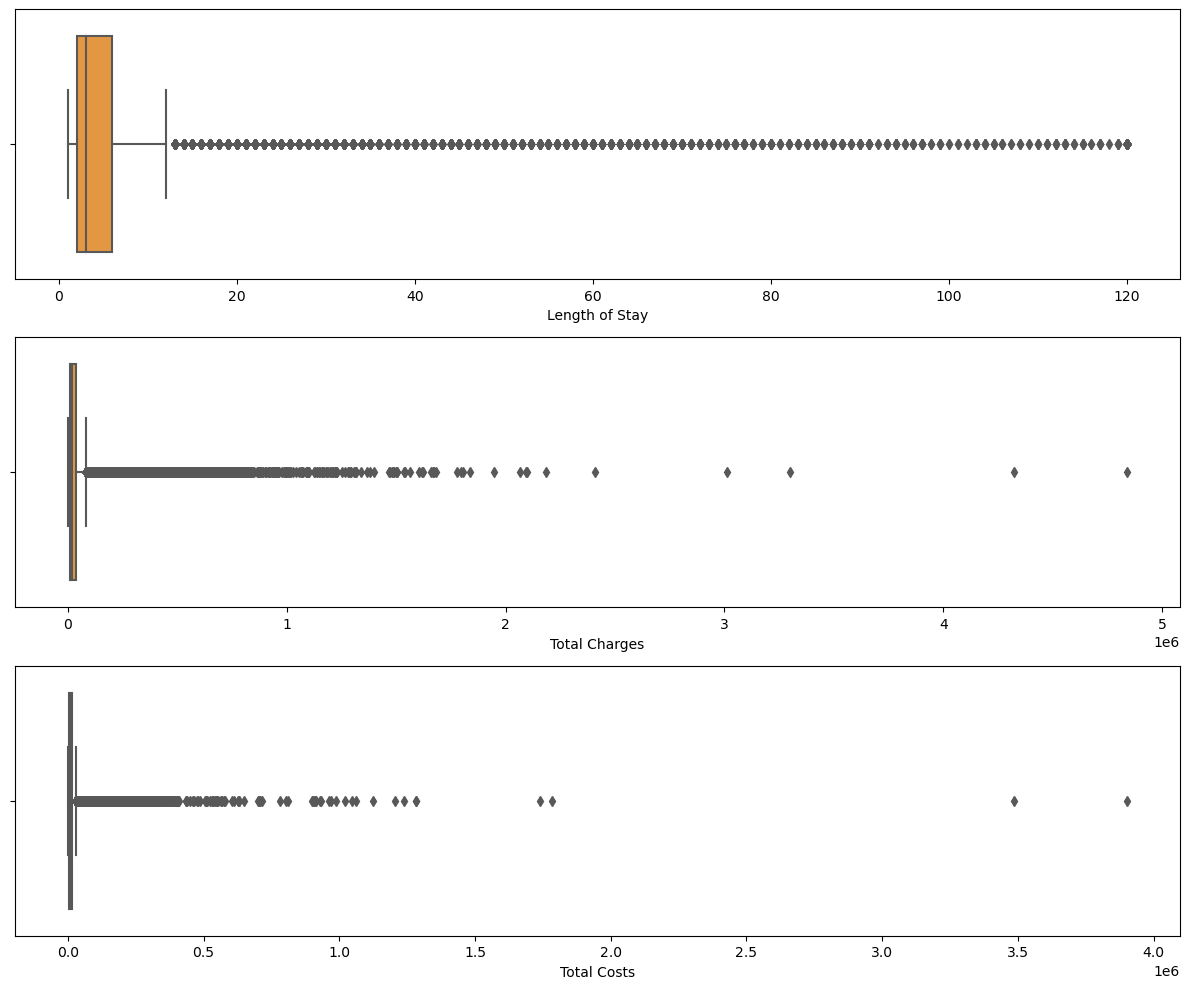

In [26]:
rows = 3
columns = 1
index=1
plt.figure(figsize=(12,10))
for i in ['Length of Stay','Total Charges','Total Costs']:
    plt.subplot(rows,columns,index)
    sns.boxplot(x= data[i],palette="YlOrBr")
    index+=1
plt.tight_layout()
plt.show()

<h3> Univariate Analysis - Categorical</h3>

In [27]:
cat_cols = ['Health Service Area','Age Group','Gender','Type of Admission','Patient Disposition',
          'APR Severity of Illness Description','APR Risk of Mortality',
          'APR Medical Surgical Description','Payment Typology 1','Payment Typology 2','Emergency Department Indicator']

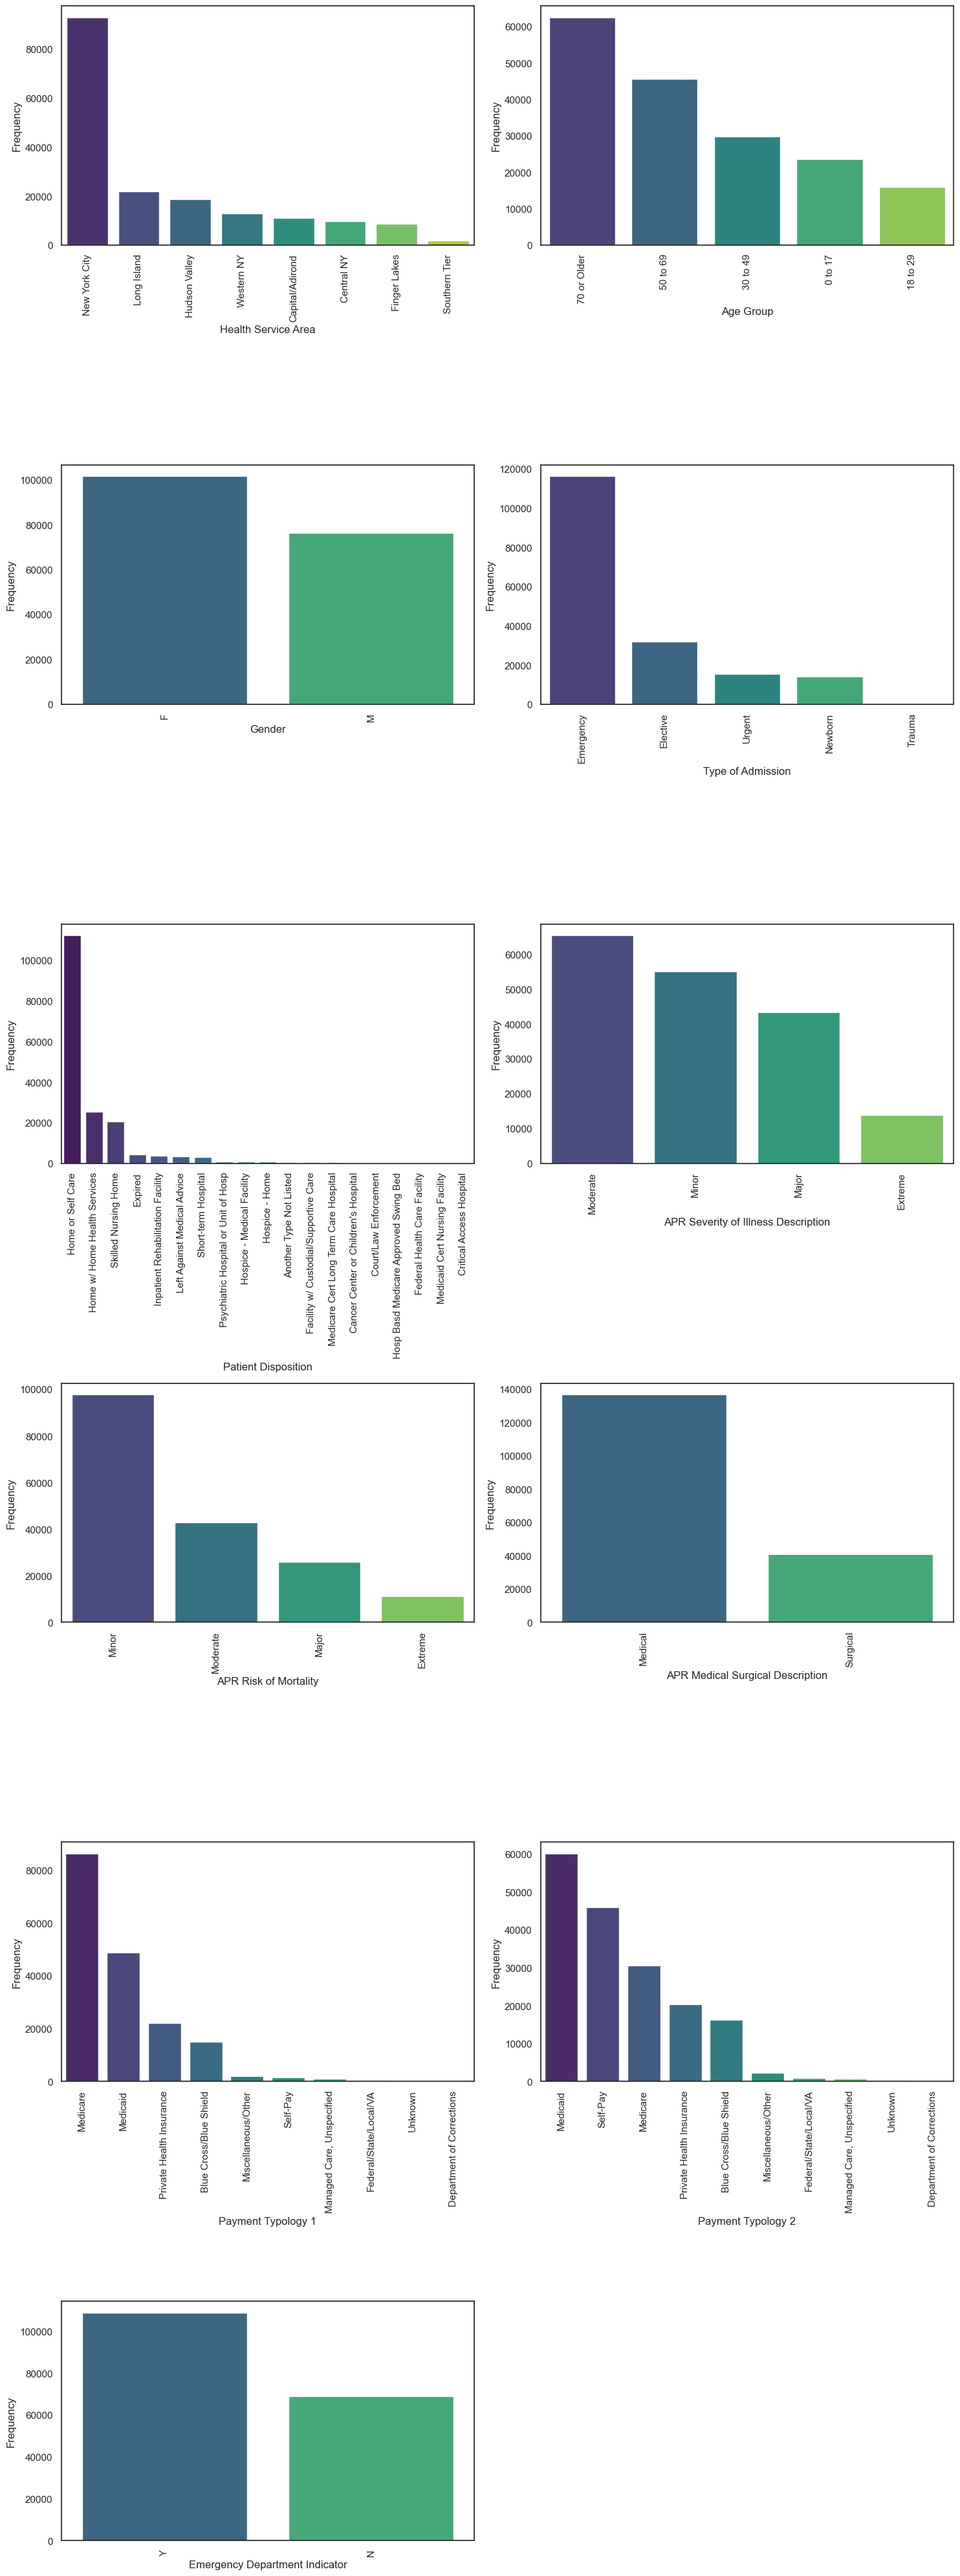

In [28]:
rows = 6
columns = 2
index = 1
plt.figure(figsize=(15,40))
sns.set(style='white')
for i in cat_cols:
    plt.subplot(rows,columns,index)
    sns.countplot(x=data[i],order = data[i].value_counts().index,palette="viridis")
    plt.ylabel('Frequency')
    plt.xticks(rotation=90)
    index +=1
plt.tight_layout()
plt.show()

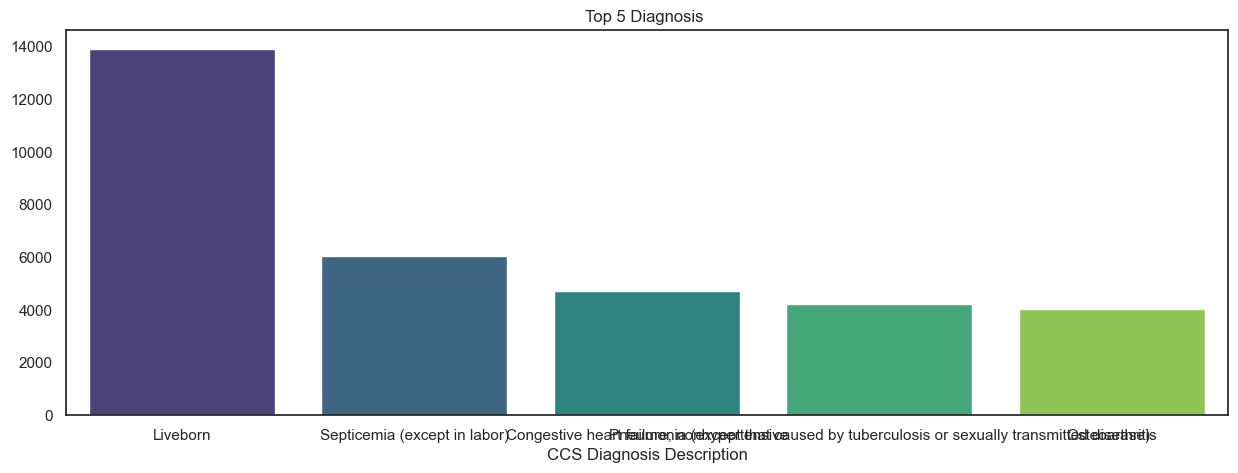

In [29]:
plt.figure(figsize=(15,5))
sns.barplot(x =data['CCS Diagnosis Description'].value_counts()[:5].index,y= data['CCS Diagnosis Description'].value_counts()[:5].values,palette="viridis" )
plt.title('Top 5 Diagnosis ')
plt.show()

**Inference:**
1. No of patients are quietly more in New York city than other cities.
2. More number of patients fall in the age category 70 years or older.
3. Female patients are more in number as comapre to male patients.
4. Patients enrolled in Emergency are huge in number.
5. Patient Disposition i.e. patients destination after discharge, mostly are in Home or Self Care prescription.
6. Mostly patients have Minor Risk of Mortality.
7. Patients have primary insurance  Medicare payment typology 1 more.
8. Patients have secondary insurance  Medicaid payment typology 2 more.
9. Top 5 Diagnosis in which maximum number of patients admitted.

 Bivariate Analysis - Numerical vs Categorical Variable(Length of Stay)

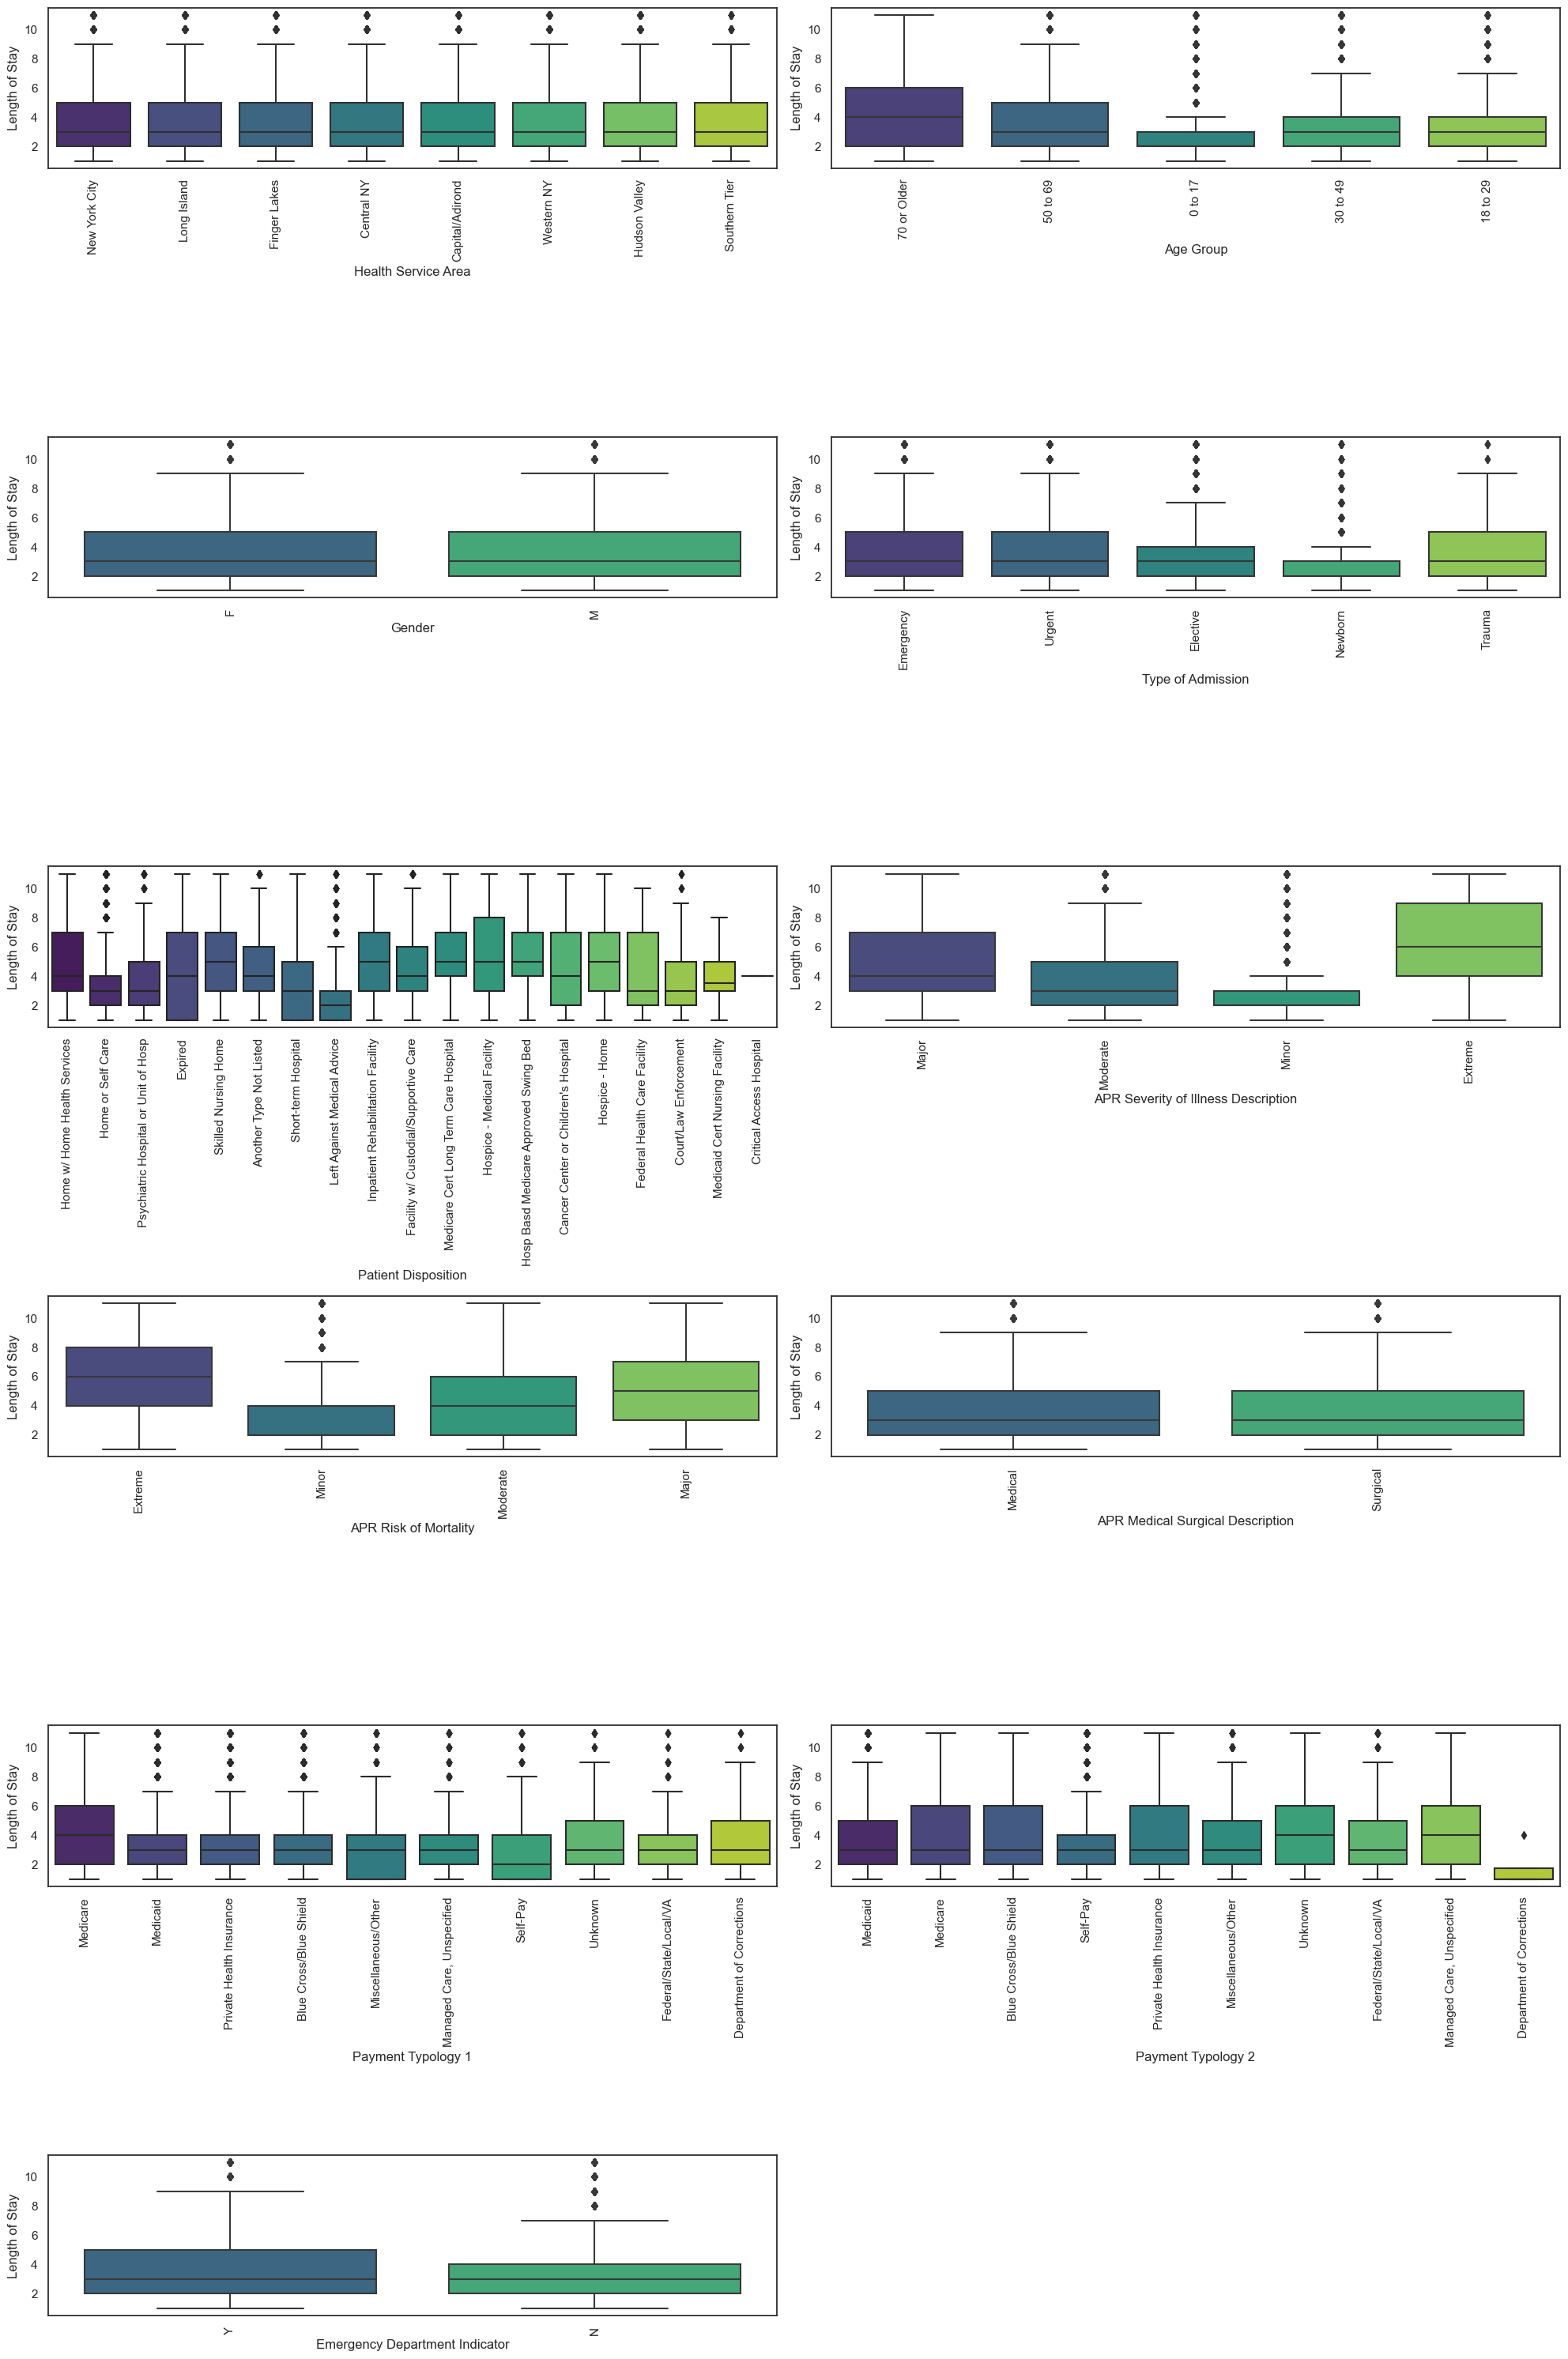

In [30]:
rows = 7
columns = 2
index = 1
plt.figure(figsize=(20,35))
for i in cat_cols:
    plt.subplot(rows,columns,index)
    q1=data['Length of Stay'].quantile(.25)
    q3=data['Length of Stay'].quantile(.75)
    iqr=q3-q1
    sns.boxplot(x=data[i],y=data['Length of Stay'][data['Length of Stay']<q3+1.5*iqr],palette="viridis",data=data[0:10000])
    plt.xticks(rotation = 90)
    index +=1
plt.tight_layout()
plt.show()

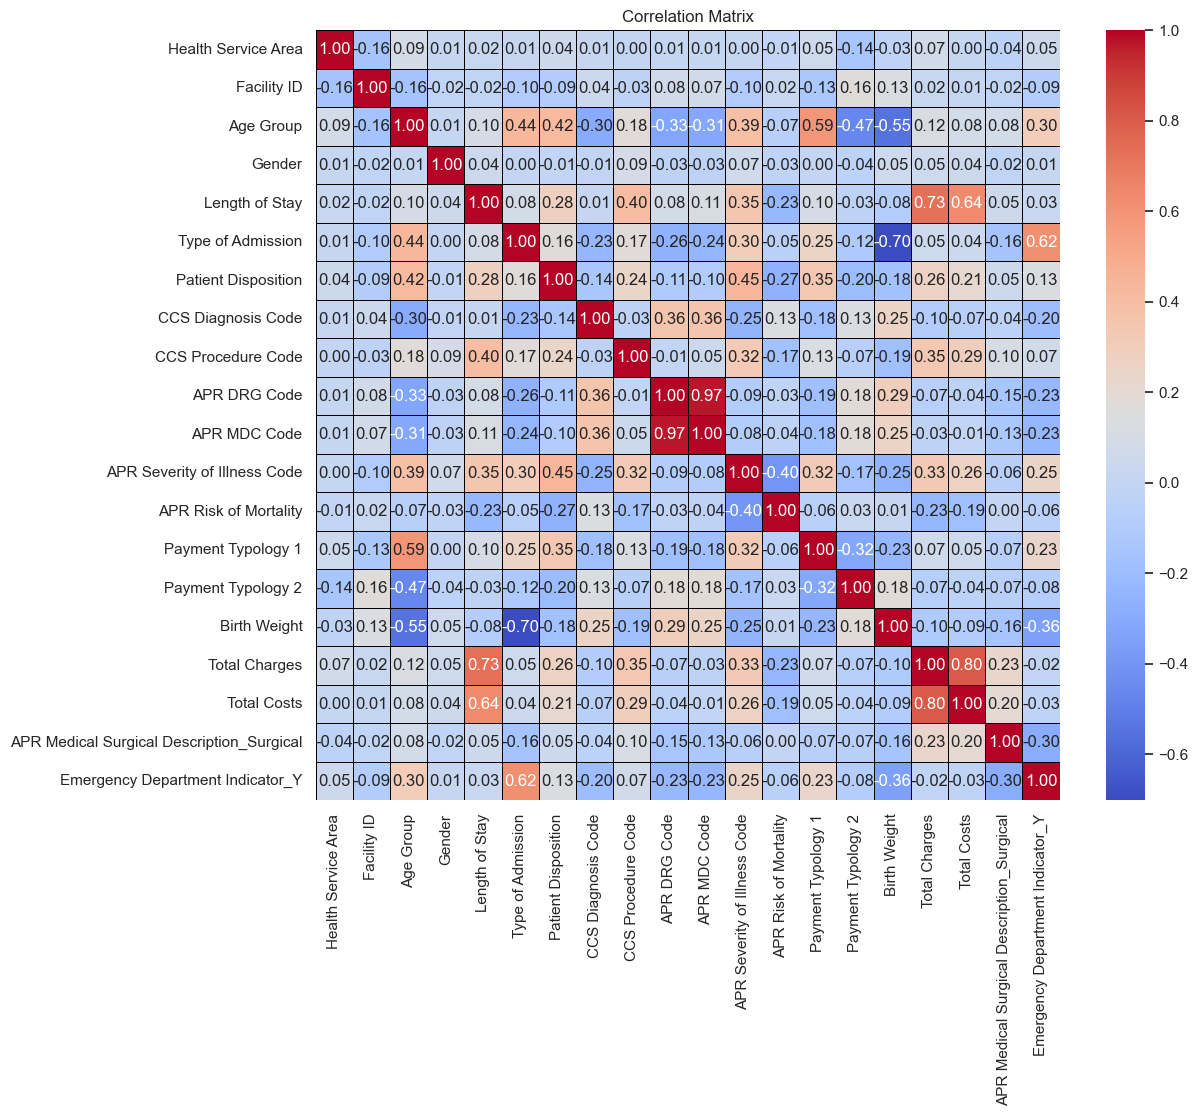

In [48]:
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(),annot=True,linecolor='black',fmt='.2f',cmap="coolwarm",linewidths = 0.5)
plt.title("Correlation Matrix")
plt.show()

In [35]:
data.columns

Index(['Health Service Area', 'Facility ID', 'Facility Name', 'Age Group',
       'Gender', 'Length of Stay', 'Type of Admission', 'Patient Disposition',
       'CCS Diagnosis Code', 'CCS Diagnosis Description', 'CCS Procedure Code',
       'CCS Procedure Description', 'APR DRG Code', 'APR DRG Description',
       'APR MDC Code', 'APR MDC Description', 'APR Severity of Illness Code',
       'APR Severity of Illness Description', 'APR Risk of Mortality',
       'APR Medical Surgical Description', 'Payment Typology 1',
       'Payment Typology 2', 'Birth Weight', 'Emergency Department Indicator',
       'Total Charges', 'Total Costs'],
      dtype='object')

In [36]:
print(f"Number of Permanent Facility Id: {data['Facility ID'].nunique()}")
print(f"Number of Facility Name: {data['Facility Name'].nunique()}")

Number of Permanent Facility Id: 217
Number of Facility Name: 228


In [37]:
print(f"Number of CCSR Diagnosis Code: {data['CCS Diagnosis Code'].nunique()}")
print(f"Number of CCSR Diagnosis Description: {data['CCS Diagnosis Description'].nunique()}")

Number of CCSR Diagnosis Code: 257
Number of CCSR Diagnosis Description: 257


In [38]:
print(f"Number of CCSR Procedure Code: {data['CCS Procedure Code'].nunique()}")
print(f"Number of CCSR Procedure Description: {data['CCS Procedure Description'].nunique()}")

Number of CCSR Procedure Code: 224
Number of CCSR Procedure Description: 224


In [39]:
print(f"Number of APR DRG Code: {data['APR DRG Code'].nunique()}")
print(f"Number of APR DRG Description: {data['APR DRG Description'].nunique()}")

Number of APR DRG Code: 311
Number of APR DRG Description: 311


In [40]:
print(f"Number of APR MDC Code: {data['APR MDC Code'].nunique()}")
print(f"Number of APR MDC Description: {data['APR MDC Description'].nunique()}")

Number of APR MDC Code: 25
Number of APR MDC Description: 25


In [41]:
print(f"Number of APR Severity of Illness Code: {data['APR Severity of Illness Code'].nunique()}")
print(f"Number of APR Severity of Illness Description: {data['APR Severity of Illness Description'].nunique()}")

Number of APR Severity of Illness Code: 4
Number of APR Severity of Illness Description: 4


**Dropping Facility Name,CCS Diagnosis Description,CCS Procedure Description,APR DRG Description,APR MDC Description columns as they are forming redundancy.**


In [42]:
data.drop(['Facility Name','CCS Diagnosis Description','CCS Procedure Description',
                  'APR DRG Description','APR MDC Description','APR Severity of Illness Description'], axis=1,inplace=True)  

In [43]:
data.head()

,Health Service Area,Facility ID,Age Group,Gender,Length of Stay,Type of Admission,Patient Disposition,CCS Diagnosis Code,CCS Procedure Code,APR DRG Code,APR MDC Code,APR Severity of Illness Code,APR Risk of Mortality,APR Medical Surgical Description,Payment Typology 1,Payment Typology 2,Birth Weight,Emergency Department Indicator,Total Charges,Total Costs
0,New York City,1630.0,70 or Older,F,3,Emergency,Home w/ Home Health Services,106,0,201,5,3,Extreme,Medical,Medicare,Medicaid,0,Y,23167.21,5512.00
1,Long Island,924.0,50 to 69,F,5,Emergency,Home or Self Care,657,0,751,19,2,Minor,Medical,Medicare,Medicaid,0,N,21746.40,4865.80
2,Finger Lakes,413.0,70 or Older,F,1,Emergency,Home or Self Care,106,193,201,5,3,Moderate,Medical,Medicare,Medicare,0,Y,4822.80,2422.93
3,New York City,1692.0,0 to 17,M,1,Emergency,Psychiatric Hospital or Unit of Hosp,242,0,812,21,2,Minor,Medical,Medicaid,Medicaid,0,Y,5468.19,4816.73
6,New York City,1294.0,30 to 49,M,6,Emergency,Home or Self Care,660,219,775,20,2,Minor,Medical,Medicare,Medicare,0,Y,12503.73,15981.72


In [44]:
# Applying Target Encoding on ['Hospital Service Area','Type of Admission','Patient Disposition',
# 'CCSR Procedure Code'] columns
for i in ['Health Service Area','Type of Admission','Patient Disposition',
          'CCS Procedure Code']:
    data[i]=data[i].map(dict(data.groupby(i)['Length of Stay'].mean()))


In [146]:
data.head()

,Health Service Area,Facility ID,Age Group,Gender,Length of Stay,Type of Admission,Patient Disposition,CCS Diagnosis Code,CCS Procedure Code,APR DRG Code,APR MDC Code,APR Severity of Illness Code,APR Risk of Mortality,Payment Typology 1,Payment Typology 2,Birth Weight,Total Charges,Total Costs,APR Medical Surgical Description_Surgical,Emergency Department Indicator_Y
0,5.619575,1630.0,4,0,3,6.007691,7.137496,94,4.560638,201,5,3,0,0.485327,0.338358,0,23167.21,5512.00,False,True
1,5.934750,924.0,3,0,5,6.007691,4.156723,249,4.560638,751,19,2,2,0.485327,0.338358,0,21746.40,4865.80,False,False
2,5.671776,413.0,4,0,1,6.007691,4.156723,94,4.964190,201,5,3,3,0.485327,0.171800,0,4822.80,2422.93,False,True
3,5.619575,1692.0,0,1,1,6.007691,8.839117,224,4.560638,812,21,2,2,0.274796,0.338358,0,5468.19,4816.73,False,True
6,5.619575,1294.0,2,1,6,6.007691,4.156723,252,6.348477,775,20,2,2,0.485327,0.171800,0,12503.73,15981.72,False,True


In [46]:
# import labelEncoder
from sklearn.preprocessing import LabelEncoder
# Applying label encoding 
data['Age Group']=LabelEncoder().fit_transform(data['Age Group'])
data['CCS Diagnosis Code']=LabelEncoder().fit_transform(data['CCS Diagnosis Code'])
data['APR Risk of Mortality']=LabelEncoder().fit_transform(data['APR Risk of Mortality'])
data['Gender']=LabelEncoder().fit_transform(data['Gender'])
data.head()




,Health Service Area,Facility ID,Age Group,Gender,Length of Stay,Type of Admission,Patient Disposition,CCS Diagnosis Code,CCS Procedure Code,APR DRG Code,APR MDC Code,APR Severity of Illness Code,APR Risk of Mortality,APR Medical Surgical Description,Payment Typology 1,Payment Typology 2,Birth Weight,Emergency Department Indicator,Total Charges,Total Costs
0,5.619575,1630.0,4,0,3,6.007691,7.137496,94,4.560638,201,5,3,0,Medical,Medicare,Medicaid,0,Y,23167.21,5512.00
1,5.934750,924.0,3,0,5,6.007691,4.156723,249,4.560638,751,19,2,2,Medical,Medicare,Medicaid,0,N,21746.40,4865.80
2,5.671776,413.0,4,0,1,6.007691,4.156723,94,4.964190,201,5,3,3,Medical,Medicare,Medicare,0,Y,4822.80,2422.93
3,5.619575,1692.0,0,1,1,6.007691,8.839117,224,4.560638,812,21,2,2,Medical,Medicaid,Medicaid,0,Y,5468.19,4816.73
6,5.619575,1294.0,2,1,6,6.007691,4.156723,252,6.348477,775,20,2,2,Medical,Medicare,Medicare,0,Y,12503.73,15981.72


In [47]:


data['Payment Typology 1']=data['Payment Typology 1'].map(dict(data['Payment Typology 1'].value_counts()/len(data)))
data['Payment Typology 2']=data['Payment Typology 2'].map(dict(data['Payment Typology 2'].value_counts()/len(data)))

# Applying One hot encoding 
data=pd.get_dummies(data,drop_first=True)


In [49]:
data.head()

,Health Service Area,Facility ID,Age Group,Gender,Length of Stay,Type of Admission,Patient Disposition,CCS Diagnosis Code,CCS Procedure Code,APR DRG Code,APR MDC Code,APR Severity of Illness Code,APR Risk of Mortality,Payment Typology 1,Payment Typology 2,Birth Weight,Total Charges,Total Costs,APR Medical Surgical Description_Surgical,Emergency Department Indicator_Y
0,5.619575,1630.0,4,0,3,6.007691,7.137496,94,4.560638,201,5,3,0,0.485327,0.338358,0,23167.21,5512.00,False,True
1,5.934750,924.0,3,0,5,6.007691,4.156723,249,4.560638,751,19,2,2,0.485327,0.338358,0,21746.40,4865.80,False,False
2,5.671776,413.0,4,0,1,6.007691,4.156723,94,4.964190,201,5,3,3,0.485327,0.171800,0,4822.80,2422.93,False,True
3,5.619575,1692.0,0,1,1,6.007691,8.839117,224,4.560638,812,21,2,2,0.274796,0.338358,0,5468.19,4816.73,False,True
6,5.619575,1294.0,2,1,6,6.007691,4.156723,252,6.348477,775,20,2,2,0.485327,0.171800,0,12503.73,15981.72,False,True


In [75]:
data.head()

,Health Service Area,Facility ID,Age Group,Gender,Length of Stay,Type of Admission,Patient Disposition,CCS Diagnosis Code,CCS Procedure Code,APR DRG Code,APR MDC Code,APR Severity of Illness Code,APR Risk of Mortality,Payment Typology 1,Payment Typology 2,Birth Weight,Total Charges,Total Costs,APR Medical Surgical Description_Surgical,Emergency Department Indicator_Y
0,5.619575,1630.0,4,0,3,6.007691,7.137496,94,4.560638,201,5,3,0,0.485327,0.338358,0,23167.21,5512.00,False,True
1,5.934750,924.0,3,0,5,6.007691,4.156723,249,4.560638,751,19,2,2,0.485327,0.338358,0,21746.40,4865.80,False,False
2,5.671776,413.0,4,0,1,6.007691,4.156723,94,4.964190,201,5,3,3,0.485327,0.171800,0,4822.80,2422.93,False,True
3,5.619575,1692.0,0,1,1,6.007691,8.839117,224,4.560638,812,21,2,2,0.274796,0.338358,0,5468.19,4816.73,False,True
6,5.619575,1294.0,2,1,6,6.007691,4.156723,252,6.348477,775,20,2,2,0.485327,0.171800,0,12503.73,15981.72,False,True


###  Evaluation and Model Building

In [55]:
# import train test split
from sklearn.model_selection import train_test_split

import statsmodels.api as sm

# sm.add_constant adds the intercept to the model
x = sm.add_constant(data.drop('Length of Stay',axis =1))
y = data['Length of Stay']

# Spliting into test and train
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.7,random_state=1)
linreg_model = sm.OLS(y_train,x_train.astype(float)).fit()
linreg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Length of Stay   R-squared:                       0.607
Model:                            OLS   Adj. R-squared:                  0.607
Method:                 Least Squares   F-statistic:                     9936.
Date:                Wed, 07 Feb 2024   Prob (F-statistic):               0.00
Time:                        10:41:00   Log-Likelihood:            -3.2945e+05
No. Observations:              122338   AIC:                         6.589e+05
Df Residuals:                  122318   BIC:                         6.591e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
const                                        -1.2919      0.441     -2.930      0.003      -2.156      -0.428
Health Service Area                          -0.5806      0.070     -8.260      0.000      -0.718      -0.443
Facility ID                                  -0.0004   1.44e-05    -28.172      0.000      -0.000      -0.000
Age Group                                     0.0290      0.012      2.364      0.018       0.005       0.053
Gender                                       -0.1906      0.021     -9.093      0.000      -0.232      -0.150
Type of Admission                             0.3332      0.026     12.752      0.000       0.282       0.384
Patient Disposition                           0.1069      0.005     19.866      0.000       0.096       0.117
CCS Diagnosis Code                            0.0072      0.000     41.878      0.000       0.007       0.008
CCS Procedure Code                            0.1861      0.004     49.458      0.000       0.179       0.193
APR DRG Code                                  0.0040      0.000     19.173      0.000       0.004       0.004
APR MDC Code                                 -0.0301      0.008     -3.599      0.000      -0.047      -0.014
APR Severity of Illness Code                  0.1017      0.015      6.760      0.000       0.072       0.131
APR Risk of Mortality                        -0.0168      0.014     -1.165      0.244      -0.045       0.011
Payment Typology 1                            1.3612      0.081     16.714      0.000       1.202       1.521
Payment Typology 2                            1.1484      0.123      9.322      0.000       0.907       1.390
Birth Weight                                  0.0001   1.93e-05      6.344      0.000    8.47e-05       0.000
Total Charges                              3.309e-05   6.39e-07     51.772      0.000    3.18e-05    3.43e-05
Total Costs                                   0.0003   1.79e-06    155.910      0.000       0.000       0.000
APR Medical Surgical Description_Surgical    -2.9274      0.030    -96.978      0.000      -2.987      -2.868
Emergency Department Indicator_Y             -0.0038      0.028     -0.134      0.894      -0.059       0.052
==============================================================================
Omnibus:                   110704.143   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         19453156.310
Skew:                           3.781   Prob(JB):                         0.00
Kurtosis:                      64.311   Cond. No.                     2.06e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is 

**Finding the variables having p_value less than 0.05, termed as insignificant variable**

In [56]:
linreg_model.pvalues>0.05

const                                        False
Health Service Area                          False
Facility ID                                  False
Age Group                                    False
Gender                                       False
Type of Admission                            False
Patient Disposition                          False
CCS Diagnosis Code                           False
CCS Procedure Code                           False
APR DRG Code                                 False
APR MDC Code                                 False
APR Severity of Illness Code                 False
APR Risk of Mortality                         True
Payment Typology 1                           False
Payment Typology 2                           False
Birth Weight                                 False
Total Charges                                False
Total Costs                                  False
APR Medical Surgical Description_Surgical    False
Emergency Department Indicator_

In [57]:
# Defining x and y Dataset for modeling
# sm.add_constant adds the intercept to the model
x = sm.add_constant(data.drop(columns=['Length of Stay','Emergency Department Indicator_Y','APR Risk of Mortality'],axis =1))
y = data['Length of Stay']

# Spliting into test and train
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.7,random_state=1)
linreg_model = sm.OLS(y_train,x_train.astype(float)).fit()
linreg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Length of Stay   R-squared:                       0.607
Model:                            OLS   Adj. R-squared:                  0.607
Method:                 Least Squares   F-statistic:                 1.110e+04
Date:                Wed, 07 Feb 2024   Prob (F-statistic):               0.00
Time:                        10:41:21   Log-Likelihood:            -3.2945e+05
No. Observations:              122338   AIC:                         6.589e+05
Df Residuals:                  122320   BIC:                         6.591e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
const                                        -1.3306      0.435     -3.061      0.002      -2.183      -0.479
Health Service Area                          -0.5805      0.070     -8.265      0.000      -0.718      -0.443
Facility ID                                  -0.0004   1.44e-05    -28.175      0.000      -0.000      -0.000
Age Group                                     0.0281      0.012      2.293      0.022       0.004       0.052
Gender                                       -0.1908      0.021     -9.102      0.000      -0.232      -0.150
Type of Admission                             0.3317      0.023     14.164      0.000       0.286       0.378
Patient Disposition                           0.1076      0.005     20.150      0.000       0.097       0.118
CCS Diagnosis Code                            0.0072      0.000     41.972      0.000       0.007       0.007
CCS Procedure Code                            0.1861      0.004     49.479      0.000       0.179       0.193
APR DRG Code                                  0.0040      0.000     19.181      0.000       0.004       0.004
APR MDC Code                                 -0.0299      0.008     -3.582      0.000      -0.046      -0.014
APR Severity of Illness Code                  0.1063      0.014      7.347      0.000       0.078       0.135
Payment Typology 1                            1.3571      0.081     16.689      0.000       1.198       1.516
Payment Typology 2                            1.1486      0.123      9.328      0.000       0.907       1.390
Birth Weight                                  0.0001   1.93e-05      6.403      0.000    8.56e-05       0.000
Total Charges                              3.311e-05   6.39e-07     51.823      0.000    3.19e-05    3.44e-05
Total Costs                                   0.0003   1.79e-06    155.972      0.000       0.000       0.000
APR Medical Surgical Description_Surgical    -2.9268      0.030    -99.124      0.000      -2.985      -2.869
==============================================================================
Omnibus:                   110700.585   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         19452798.973
Skew:                           3.781   Prob(JB):                         0.00
Kurtosis:                      64.311   Cond. No.                     2.03e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.03e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Assumptions of MLR Model 

Now, use the model with significant variabels to check some of the assumptions based on the residuals of linear regression:

1. Linear Relationship Between Dependent and Independent Variable
2. Autocorrelation
3. Heteroscedasticity
4. Tests of Normality

**1. Linear Relationship between Dependent and Independent Variable**

An assumption of linear regression is that it should be linear in the parameter. To check the linearity we plot a graph of residuals and each independent variable. If the plot shows no specific pattern then we can conclude the presence of linearity.

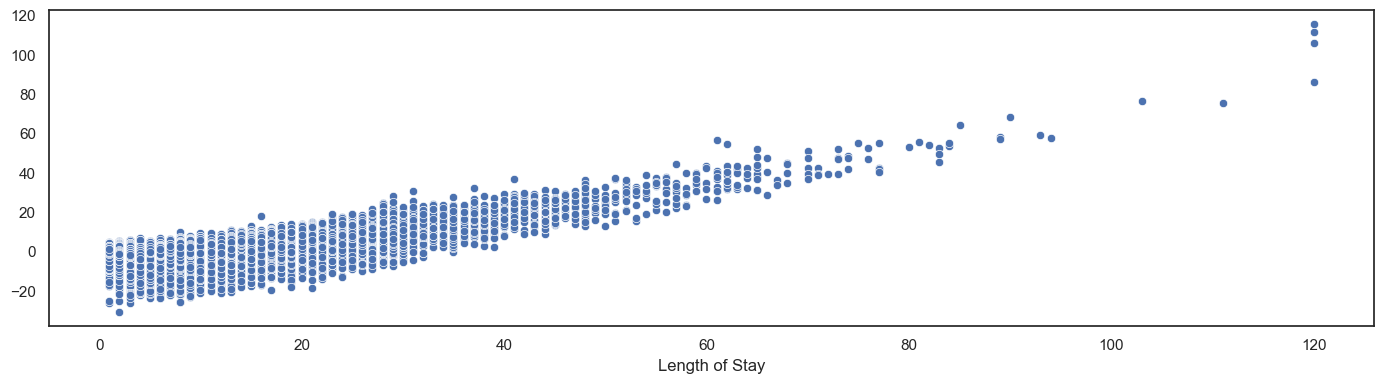

In [58]:
# Visualizing the transformed features
rows = 1
columns = 1
index = 1
plt.figure(figsize=(14,4))
# sns.set(style='darkgrid')
for i in ['Length of Stay']:
    plt.subplot(rows,columns,index)
    sns.scatterplot(x=data[i], y=linreg_model.resid )
    index +=1
plt.tight_layout()
plt.show()

**Interpretation:** The above plots show no specific pattern, implies that there is a linearity present in the data.

**2. Autocorrelation**

From the above summary, we can observe that the value obtained from the Durbin-Watson test statistic is close to 2 (= 2.008). Thus, we conclude that there is no autocorrelation.

**3. Heteroscedasticity**

Breusch-Pagan is one of the tests for detecting heteroskedasticity in the residuals.<br>
The test hypothesis for the Breusch-Pagan test is given as:


In [59]:
from statsmodels.stats.api import het_breuschpagan
test = list(het_breuschpagan(linreg_model.resid, linreg_model.model.exog))
print(f'p_value: {test[3]} ')


p_value: 0.0 


**Interpretation:** We observe that the p-value is less than 0.05 thus, we conclude that there is heteroskedasticity present in the data.

**4. Test of Normality**

In [60]:
from scipy.stats import anderson



# Anderson-Darling test for normality
result = anderson(linreg_model.resid)

# Print the critical values and the test statistic
print(f'Test Statistic: {result.statistic}')
print(f'Critical Values: {result.critical_values}')

# Compare the test statistic with the critical values
for i, cv in enumerate(result.critical_values):
    if result.statistic < cv:
        print(f'Fail to reject at {result.significance_level[i]*100}% level of significance.')
    else:
        print(f'Reject at {result.significance_level[i]*100}% level of significance.')


Test Statistic: 6073.5237799506285
Critical Values: [0.576 0.656 0.787 0.918 1.092]
Reject at 1500.0% level of significance.
Reject at 1000.0% level of significance.
Reject at 500.0% level of significance.
Reject at 250.0% level of significance.
Reject at 100.0% level of significance.


**Interpretation:** indicating that the data may not follow a normal distribution.

###  Model Evaluation and Performance

As R2 and Adj R2 are 0.607 anf pvalue of F-statistic is 0.00 which is less than 0.05, the model is significant.

In [61]:
y_train_pred = linreg_model.predict(x_train)
y_test_pred = linreg_model.predict(x_test)

**Mean Squared error**

In [62]:
# importing libraries to calculte errors of the model
from sklearn.metrics import mean_squared_error,r2_score

mse_train = round(mean_squared_error(y_train, y_train_pred),4)

# MSE for the training set
print(f'Mean Squared Error on training set: {mse_train}')
mse_test = round(mean_squared_error(y_test, y_test_pred),4)

#for the test set
print(f'Mean Squared Error on test set: {mse_test}')

Mean Squared Error on training set: 12.781
Mean Squared Error on test set: 12.7847


**Root Mean Squared Error (RMSE)**

In [63]:
rmse_train = round(np.sqrt(mean_squared_error(y_train, y_train_pred)),4)

# MSE for the training set
print(f'Root Mean Squared Error on training set: {rmse_train}')
rmse_test = round(np.sqrt(mean_squared_error(y_test, y_test_pred)),4)

#for the test set
print(f'Root Mean Squared Error on test set: {rmse_test}')

Root Mean Squared Error on training set: 3.5751
Root Mean Squared Error on test set: 3.5756


In [65]:
# Defining function for calculating performance
def building_model(model,x_train,x_test,y_train,y_test):
    model.fit(x_train,y_train)    
    
    y_pred_test = model.predict(x_test)
    y_pred_train = model.predict(x_train)
    
    print('R2 score on test data: ', r2_score(y_test,y_pred_test))
    print('R2 score on train data: ', r2_score(y_train,y_pred_train))
    
    print(f'RMSE Traning: {round(np.sqrt(mean_squared_error(y_train,y_pred_train)),4)}')
    print(f'RMSE Testing: {round(np.sqrt(mean_squared_error(y_test,y_pred_test)),4)}')
    print(f'MSE on Test Data: {(mean_squared_error(y_test,y_pred_test))}')

In [67]:
# import Regression libraries
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import LogisticRegression
from xgboost import XGBRegressor

# Buiding Models for six Regressor Algorithms
models = []
models.append(['Linear Regreesion', LinearRegression()])
models.append(['KNeighbors', KNeighborsRegressor(n_neighbors=5)])
models.append(['Decision Tree', DecisionTreeRegressor(max_depth=4,random_state=10)])
models.append(['Random Forest', RandomForestRegressor(max_depth=4,random_state=10)])
models.append(['Adaboost', AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=4,random_state=10))])
models.append(['XGBoost', XGBRegressor(max_depth =3)])

lst_1= []
for m in range(len(models)):
    lst_2= []
    model = models[m][1]
    model.fit(x_train,y_train)   
    y_pred = model.predict(x_test)
    
    
    rmse = np.sqrt(mean_squared_error(y_test, y_pred)) 
    mse = mean_squared_error(y_test, y_pred)  
    mape = mean_absolute_percentage_error(y_test, y_pred)  
    lst_2.append(models[m][0])
    lst_2.append((r2_score(y_test, y_pred))) 
    lst_2.append(mse)
    lst_2.append(rmse)
    lst_2.append(mape)
    
    lst_1.append(lst_2)

In [68]:
# Creating the dataframe for all the classifiers with their respective metrics
df = pd.DataFrame(lst_1, columns= ['Model', 'R2-score',  'MSE', 'RMSE', 'MAPE'])


df.sort_values(by= ['R2-score'], inplace= True, ascending= False)
df

,Model,R2-score,MSE,RMSE,MAPE
5,XGBoost,0.819700,5.936096,2.436410,0.346581
3,Random Forest,0.657958,11.261190,3.355770,0.546093
2,Decision Tree,0.640926,11.821915,3.438301,0.556775
0,Linear Regreesion,0.611685,12.784653,3.575563,0.594782
1,KNeighbors,0.506915,16.234025,4.029147,0.489538
4,Adaboost,0.109876,29.305889,5.413491,1.983542


## Performing GridSearchCV

In [69]:
tuned_parameters= {'max_depth': [3,5,6,7,9],
            'learning_rate': [0.1,0.01,0.03,0.5],
                  'n_estimators':[50,100,150]}

In [70]:
# import train test split
from sklearn.model_selection import GridSearchCV

Xgb_gscv = GridSearchCV(estimator=XGBRegressor(),param_grid=tuned_parameters,scoring='r2',verbose=True)
Xgb_gscv.fit(x_train,y_train)
print(Xgb_gscv.best_params_)


Fitting 5 folds for each of 60 candidates, totalling 300 fits
{'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 150}


In [73]:
building_model(XGBRegressor(max_depth = 7,learning_rate=0.03,n_estimators= 150),x_train,x_test,y_train,y_test)

R2 score on test data:  0.8385362278923317
R2 score on train data:  0.8683406232946922
RMSE Traning: 2.0688
RMSE Testing: 2.3056
MSE on Test Data: 5.315931557625049


**Inferences:**

1. The overall R2 score for training and testing data are close which suggests that there is `no major overfitting` of the model.
2. The R2 score for the testing data suggests that the model `correctly predicts about 84% records of unseen data`. 
